## 라이브러리 및 데이터 불러오기

In [30]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 결측값 시각화를 위한 라이브러리
import missingno as msno

# 폰트 설정

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=True)
plt.rcParams.update({
    'font.size': 8,          # 폰트 크기
    'figure.dpi': 150,        # DPI 설정
    'savefig.dpi': 300        # 저장 시 DPI 설정
})

In [31]:
### 데이터 불러오기
import pandas as pd
df = pd.read_csv('./final_result.csv')
df.head(2)

id        title  score_val category            descript  \
0    35849217  쭈꾸미블루스 신촌본점       4.59    주꾸미요리  신촌 맛집 날치알쌈과 매운 쭈꾸미   
1  1749849331   금고기비스트로 신촌        NaN  육류,고기요리                 NaN   

                                             reviews  keyword1   keyword2  \
0  노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...  음식이 맛있어요       친절해요   
1  지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...  음식이 맛있어요  고기 질이 좋아요   

    keyword3  
0  인테리어가 멋져요  
1       친절해요

## 전처리

### 데이터 기본 정보 확인

In [32]:
### 데이터셋 크기 - 694개의 매장, 9개의 변수
print(df.shape)

(694, 9)


In [33]:
### 중복 데이터 여부 - 중복 데이터 없음
print(df.duplicated().sum())

0


In [34]:
### 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         694 non-null    int64  
 1   title      694 non-null    object 
 2   score_val  411 non-null    float64
 3   category   694 non-null    object 
 4   descript   197 non-null    object 
 5   reviews    688 non-null    object 
 6   keyword1   670 non-null    object 
 7   keyword2   670 non-null    object 
 8   keyword3   670 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 48.9+ KB


In [35]:
### 기초통계량 확인
df.describe(include='all')

id        title   score_val category         descript  \
count   6.940000e+02          694  411.000000      694              197   
unique           NaN          694         NaN      103              121   
top              NaN  쭈꾸미블루스 신촌본점         NaN   카페,디저트  농림축산식품부 제공 안심식당   
freq             NaN            1         NaN       77               60   
mean    9.644206e+08          NaN    4.493942      NaN              NaN   
std     7.208154e+08          NaN    0.164158      NaN              NaN   
min     1.156046e+07          NaN    3.960000      NaN              NaN   
25%     3.736842e+07          NaN    4.390000      NaN              NaN   
50%     1.175964e+09          NaN    4.480000      NaN              NaN   
75%     1.580253e+09          NaN    4.590000      NaN              NaN   
max     1.996931e+09          NaN    4.950000      NaN              NaN   

                                                  reviews  keyword1 keyword2  \
count                                                 688       670      670   
unique                                                688        16       24   
top     노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...  음식이 맛있어요     친절해요   
freq                                                    1       489      169   
mean                                                  NaN       NaN      NaN   
std                                                   NaN       NaN      NaN   
min                                                   NaN       NaN      NaN   
25%                                                   NaN       NaN      NaN   
50%                                                   NaN       NaN      NaN   
75%                                                   NaN       NaN      NaN   
max                                                   NaN       NaN      NaN   

       keyword3  
count       670  
unique       31  
top        친절해요  
freq        183  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

id             0
title          0
score_val    283
category       0
descript     497
reviews        6
keyword1      24
keyword2      24
keyword3      24
dtype: int64


<AxesSubplot:>

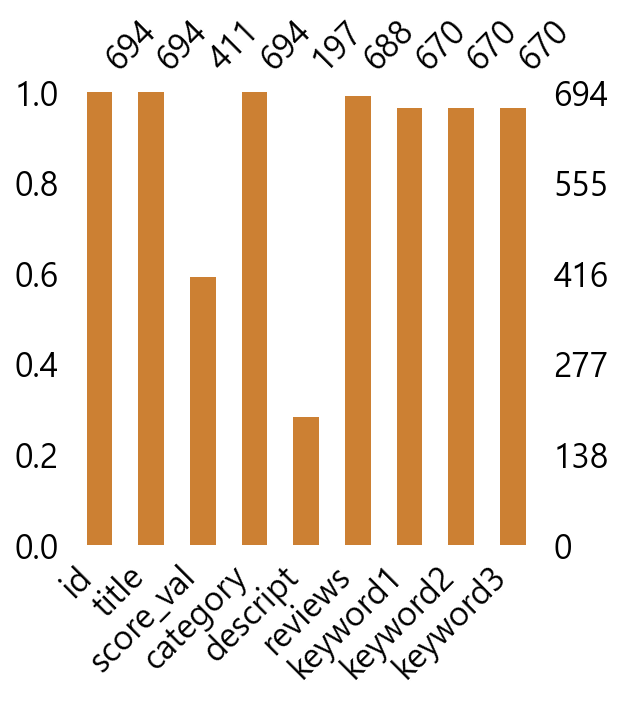

In [36]:
### 결측치 확인
print(df.isnull().sum())

# 결측치 시각화 
import missingno as msno
msno.bar(df=df.iloc[:,:], figsize=(4,4), color=(0.8,0.5,0.2))

### 필요없는 변수 제거
- id, title : 식별값이므로 모델 학습에 불필요
- score_val, descript : 결측치가 너무 많아 분석에서 제외

In [37]:
df = df.drop(['id','title','score_val','descript'], axis=1)
df.shape

(694, 5)

### 결측치 처리

- keyword와 reviews에 존재하는 결측치 dropna  
    → 최종 670개의 매장, 5개의 변수

In [38]:
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

category    0
reviews     0
keyword1    0
keyword2    0
keyword3    0
dtype: int64
(670, 5)


### category 변수 재범주화
- 범주가 많아서 조금 더 큰 범주로 재분류

<AxesSubplot:>

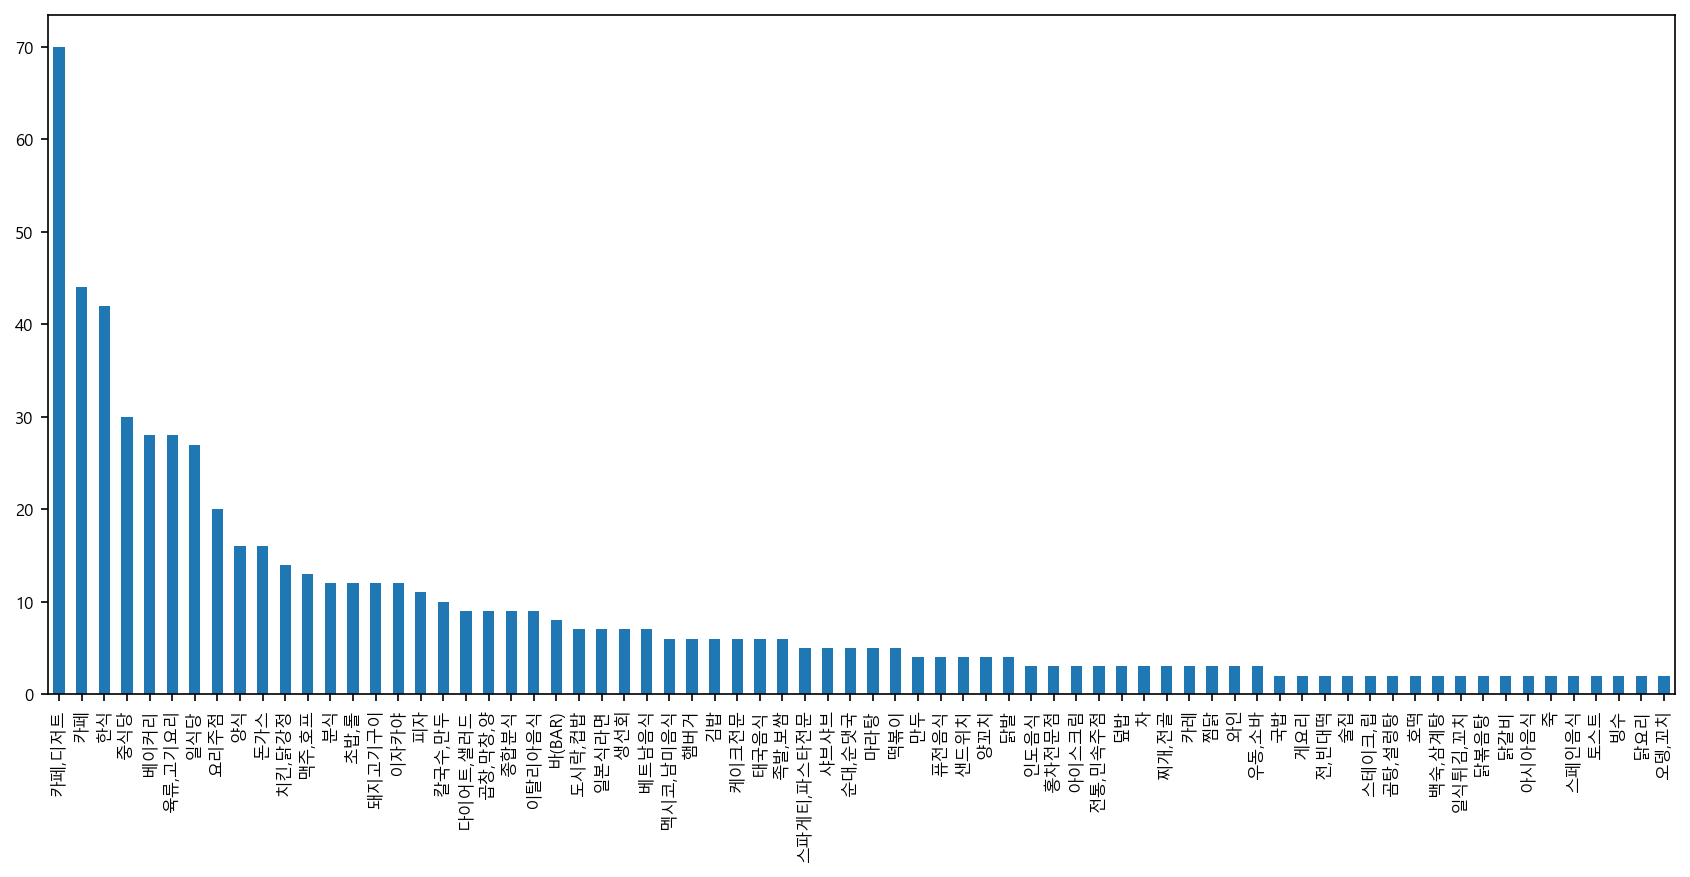

In [39]:
### category 분포 확인
plt.figure(figsize=(14,6))
type_value_counts = df['category'].value_counts()
type_value_counts[type_value_counts>1].plot.bar()   # value_counts가 1보다 큰 값에 대해서만 시각화

<AxesSubplot:>

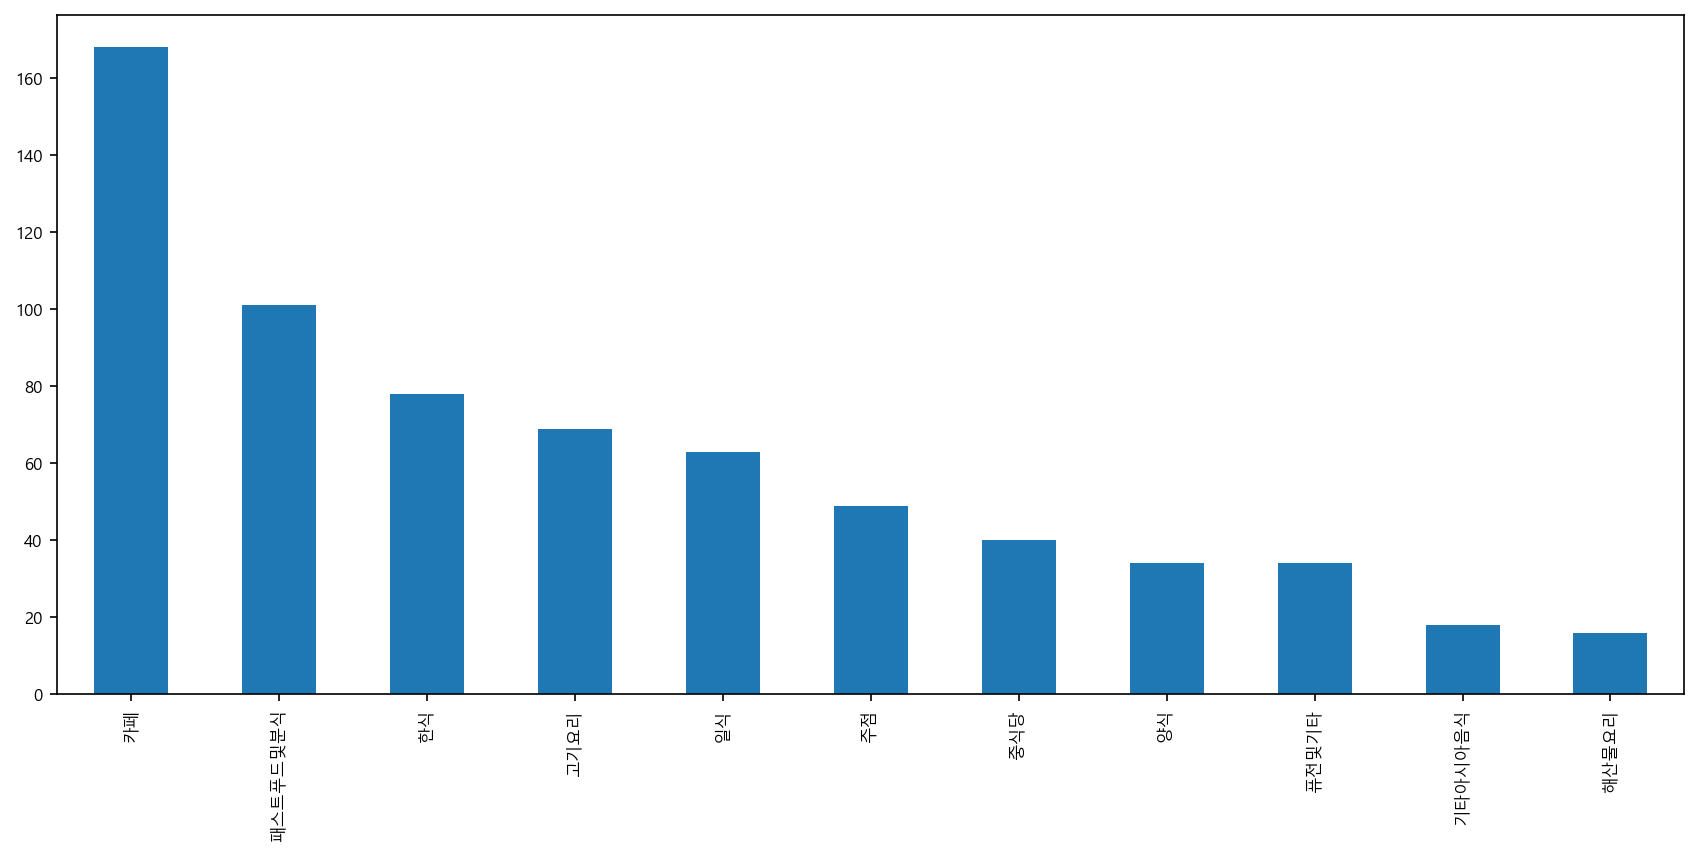

In [40]:
### 11개의 범주로 재분류
a = ['카페,디저트','카페','베이커리','케이크전문','아이스크림','빙수','호떡',
     '토스트','와플','홍차전문점','차','테이크아웃커피','브런치카페','브런치','베이글']
re = {k: '카페' for k in a}

df_cat = df.copy()
df_cat['category'].replace(re, inplace=True)

b = ['한식','곰탕,설렁탕','국밥','백숙,삼계탕','감자탕','순대,순댓국','찌개,전골',
     '해장국','추어탕','한정식-일반','백반,가정식','향토음식','칼국수,만두','샤브샤브','한식뷔페']
re = {k: '한식' for k in b}
df_cat['category'].replace(re, inplace=True)

c = ['중식당','마라탕','양꼬치','딤섬,중식만두']
re = {k: '중식당' for k in c}
df_cat['category'].replace(re, inplace=True)

d = ['일식당','초밥,롤','일본식라면','우동,소바','일식튀김,꼬치','이자카야']
re = {k: '일식' for k in d}
df_cat['category'].replace(re, inplace=True)

e = ['양식','이탈리아음식','스파게티,파스타전문','프랑스음식','패밀리레스토랑','스페인음식']
re = {k: '양식' for k in e}
df_cat['category'].replace(re, inplace=True)

f = ['베트남음식','태국음식','인도음식','아시아음식']
re = {k: '기타아시아음식' for k in f}
df_cat['category'].replace(re, inplace=True)

g = ['육류,고기요리','스테이크,립','돼지고기구이','소고기구이','족발,보쌈','곱창,막창,양','닭발', 
     '닭볶음탕','닭갈비','닭요리','고기뷔페']
re = {k: '고기요리' for k in g}
df_cat['category'].replace(re, inplace=True)

h = ['치킨,닭강정','피자','분식','종합분식','떡볶이','돈가스','햄버거','김밥','샌드위치',
     '도시락,컵밥','만두','밀키트','푸드코트','라면','국수','오뎅,꼬치','냉면']
re = {k: '패스트푸드및분식' for k in h}
df_cat['category'].replace(re, inplace=True)

i = ['요리주점','맥주,호프','바(BAR)','전통,민속주점','술집','와인']
re = {k: '주점' for k in i}
df_cat['category'].replace(re, inplace=True)

j = ['생선회','해물,생선요리','아귀찜,해물찜','주꾸미요리','낙지요리','복어요리','대게요리','조개요리','게요리']
re = {k: '해산물요리' for k in j}
df_cat['category'].replace(re, inplace=True)
     
l = ['퓨전음식','다이어트,샐러드','죽','전,빈대떡','두부요리','카레','찜닭','덮밥','멕시코,남미음식','찐빵']
re = {k: '퓨전및기타' for k in l}
df_cat['category'].replace(re, inplace=True)

df_cat['category'].value_counts()

plt.figure(figsize=(14,6))
df_cat['category'].value_counts().plot.bar()

### reviews의 이모티콘과 문장부호 등 제거

In [41]:
# !pip install emoji
import re
import emoji

def remove_emoji(text):
    text = emoji.demojize(text)
    emoji_name_pattern = r':[a-zA-Z_]+:'
    return re.sub(emoji_name_pattern, '', text)

In [61]:
# !pip install emoji
import re
import emoji

url_pattern = re.compile(r'http\S+|www\S+')

def clean_text(review):
    review = re.sub(r'[@%\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~$\'\"\n\]\[\>]', '',review) #@%*=()/+ 와 같은 문장부호 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    review = emoji.replace_emoji(review, replace='') #emoji 삭제
    review = url_pattern.sub('', review) #url 삭제
    return review

df_emoji = df_cat.copy()
df_emoji['reviews'] = df['reviews'].apply(clean_text)

print(df_cat['reviews'][3])
print(df_emoji['reviews'][3])
print('\n')
print(df_cat['reviews'][4])
print(df_emoji['reviews'][4])

이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다.  https://m.blog.naver.com/aquawhta/223476136028 / 우연히 들른집인데 맛집이었네요! 우리 입장 후부터 웨이팅 장난아님! 삼겹이 김치와 구워나오고 볶음밥 못먹은게 아쉬움! / 늘 정통집 지나갈때마다 사람이 북적거려서 궁금했는데 맛있네요 ㅋㅋㅋㅋ 돼지김치구이 맛집 인정입니다 ! / 역시 정통집 좋아요 / 언제나 신촌 밥?술집 ㅋㅋㅋㅋ 그냥 평타이상이다.  꼭 가보세여 / 돼지김치구이도 너무 맛있고 사장님도 친절하셔서 좋아요~ / 돼지김치구이(중) (30,000) 세 명이서 먹기좋은 양으로, 고기는 비계가 많아서 갠적으로는 좋았습니다..ㅎㅎ 고기냄새가 약간 있었던 것은 사실이나, 정통집에서 먹으라는대로 깻잎+콘+마요+쌈장+마늘 조합으로 먹으니 끝도없이 들어가더라구요? 양념의 매콤함을 콘이랑 마요가 잡아준달까. 맵지 않게 드시려는 분들에게 추천. 볶음밥 2개(5,000)도 나름 괜찮았고 배불렀어요.  그치만 저는 기냥 경험해본 걸로 만족. / 굿 / 음.... 양이 많지 않은 편으로  인원수에 맞춰서 혹은 인원수 보다 +1 정도 시키시고  제가 갔을 때는 껍데기가 너무 냄새가 많이 났어요 / 굿
이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다  우연히 들른집인데 맛집이었네요 우리 입장 후부터 웨이팅 장난아님 삼겹이 김치와 구워나오고 볶음밥 못먹은게 아쉬움 늘 정통집 지나갈때마다 사람이 북적거려서 궁금했는데 맛있네요 ㅋㅋㅋㅋ 돼지김치구이 맛집 인정입니다 역시 정통집 좋아요 언제나 신촌 밥술집 ㅋㅋㅋㅋ 그냥 평타이상이다 꼭 가보세여 돼지김치구이도 너무 맛있고 사장님도 친절하셔서 좋아요 돼지김치구이중 30000 세 명이서 먹기좋은 양으로 고기는 비계가 많아서 갠적으로는 좋았습니다ㅎㅎ 고기냄새가 약간 있었던 것은 사실이나 정통집에서 먹으라는대로 깻잎콘마요쌈장마늘 조합으로 먹으니 끝도없이 들어가더라구요 양념의 매콤함을 콘이랑 마요가 

### 전처리한 데이터 내보내기

In [62]:
df_emoji.to_csv("./preprocessed_review_data.csv", encoding='utf-8-sig', index=False)
df_emoji.head()

category                                            reviews  keyword1  \
0    해산물요리  노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...  음식이 맛있어요   
1     고기요리  지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...  음식이 맛있어요   
2      중식당  협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...  음식이 맛있어요   
3     고기요리  이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다  우연...  음식이 맛있어요   
4       한식  생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...  음식이 맛있어요   

    keyword2     keyword3  
0       친절해요    인테리어가 멋져요  
1  고기 질이 좋아요         친절해요  
2  인테리어가 멋져요  특별한 메뉴가 있어요  
3     양이 많아요         친절해요  
4     양이 많아요     재료가 신선해요

## EDA

In [63]:
### 데이터 다시 불러오기
df = pd.read_csv("./preprocessed_review_data.csv", encoding='utf-8')
df.head(2)

category                                            reviews  keyword1  \
0    해산물요리  노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...  음식이 맛있어요   
1     고기요리  지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...  음식이 맛있어요   

    keyword2   keyword3  
0       친절해요  인테리어가 멋져요  
1  고기 질이 좋아요       친절해요

### 리뷰 길이의 평균

In [78]:
review_len_mean = np.mean(df['reviews'].str.len())
print('리뷰의 평균 길이 :',round(review_len_mean,0))

리뷰의 평균 길이 : 955.0


### category 분포 확인

<AxesSubplot:>

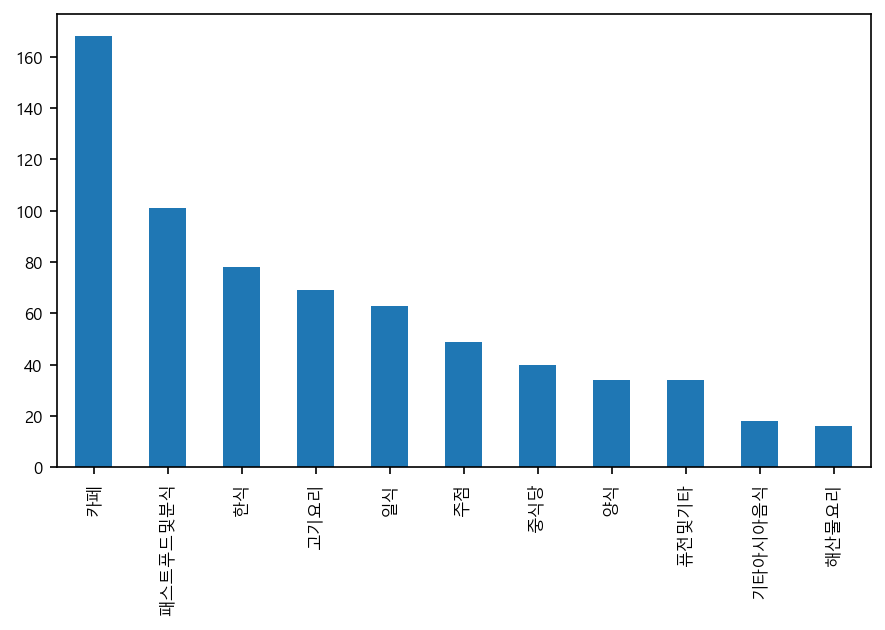

In [64]:
plt.figure(figsize=(7,4))
df_cat['category'].value_counts().plot.bar()

### keyword 분포 확인

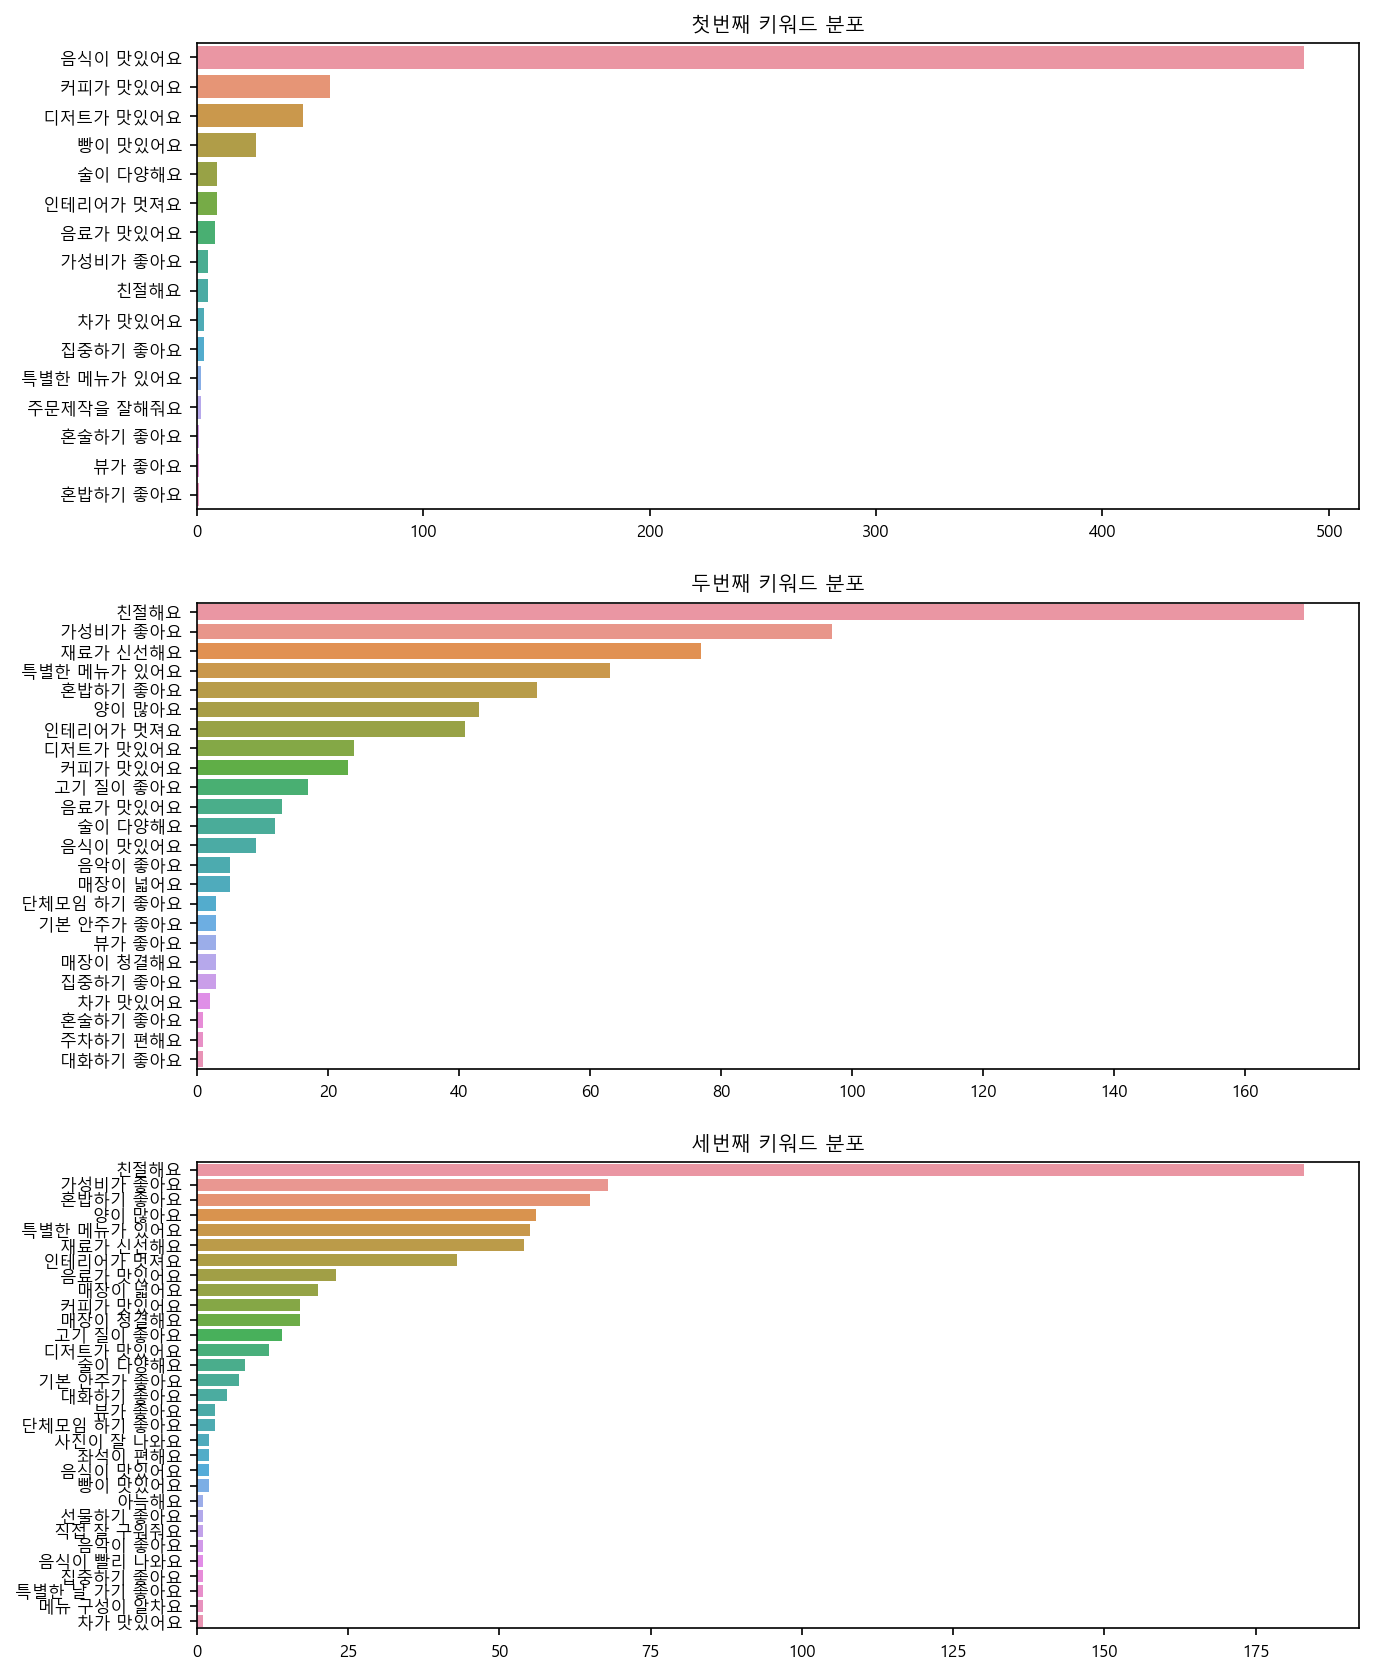

In [77]:
### keyword
fig, ax = plt.subplots(3, 1, figsize=(10,14))
sns.countplot(y='keyword1', data=df, order=df['keyword1'].value_counts().index, ax=ax[0])
ax[0].set_title('첫번째 키워드 분포')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.countplot(y='keyword2', data=df, order=df['keyword2'].value_counts().index, ax=ax[1])
ax[1].set_title('두번째 키워드 분포')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.countplot(y='keyword3', data=df, order=df['keyword3'].value_counts().index, ax=ax[2])
ax[2].set_title('세번째 키워드 분포')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### category별 keyword의 분포

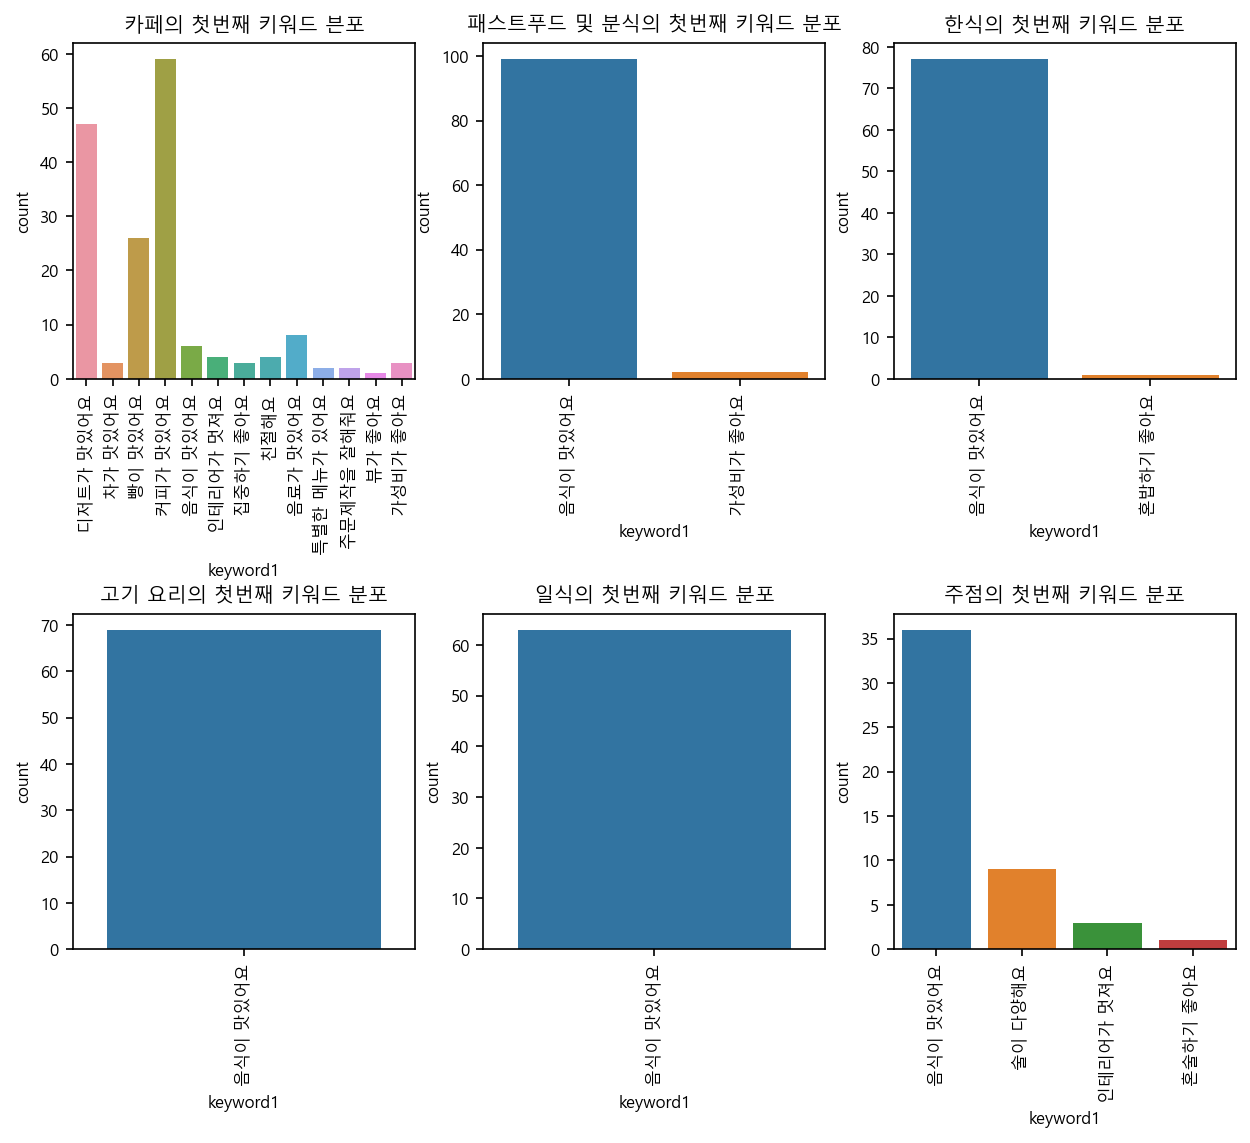

In [79]:
### keyword1
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword1', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 첫번째 키워드 븐포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 첫번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 첫번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 첫번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 첫번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 첫번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

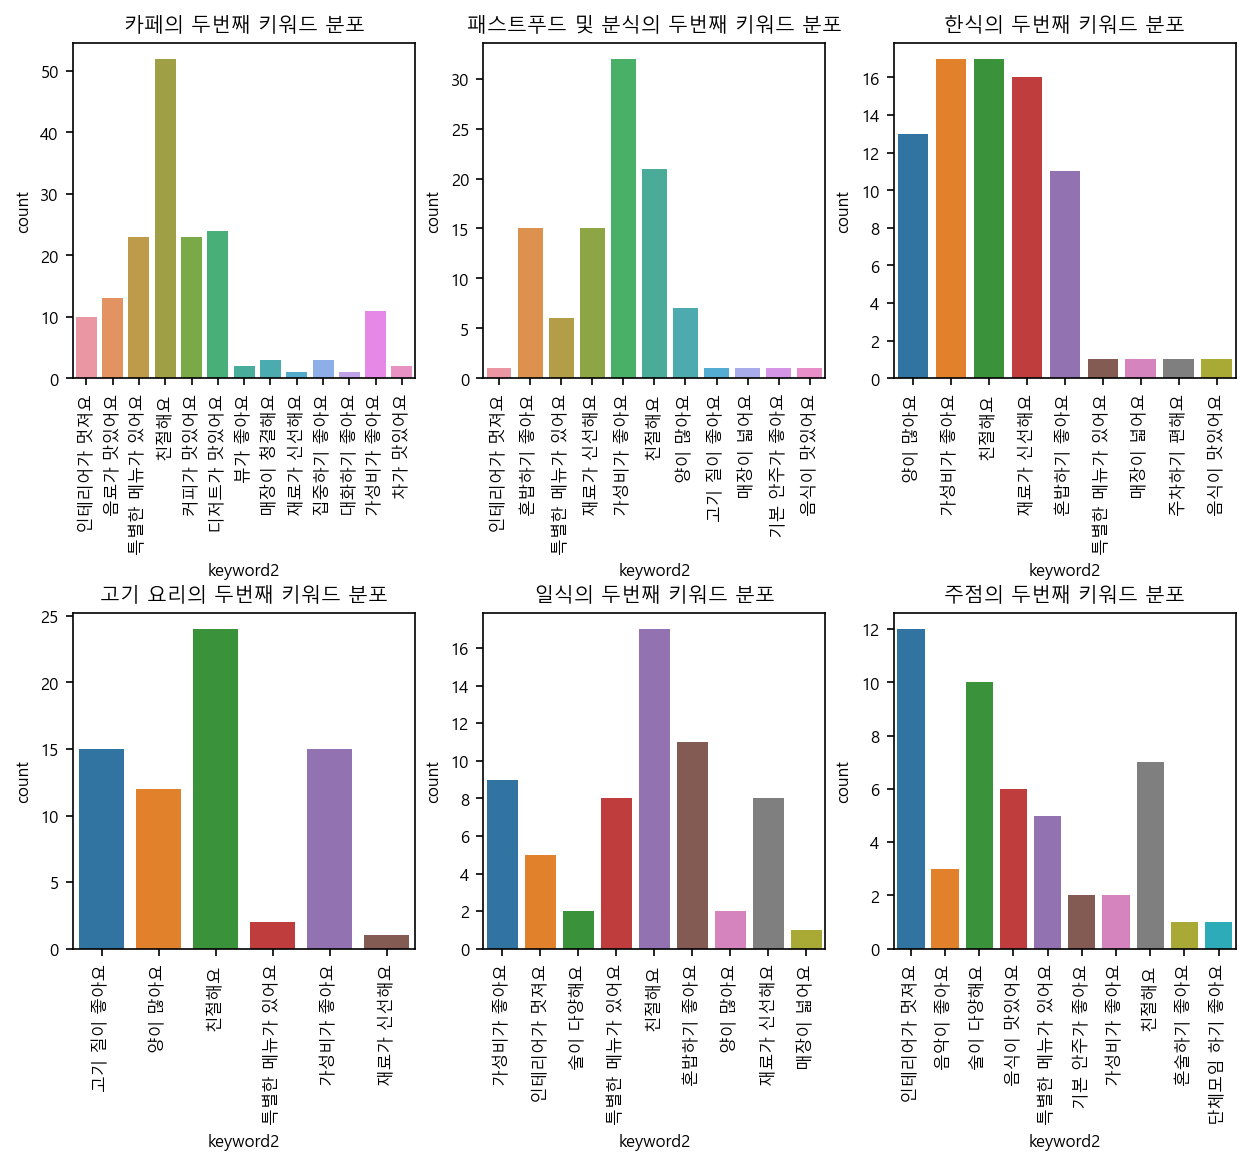

In [80]:
### keyword2
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword2', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 두번째 키워드 분포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 두번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 두번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 두번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 두번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 두번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

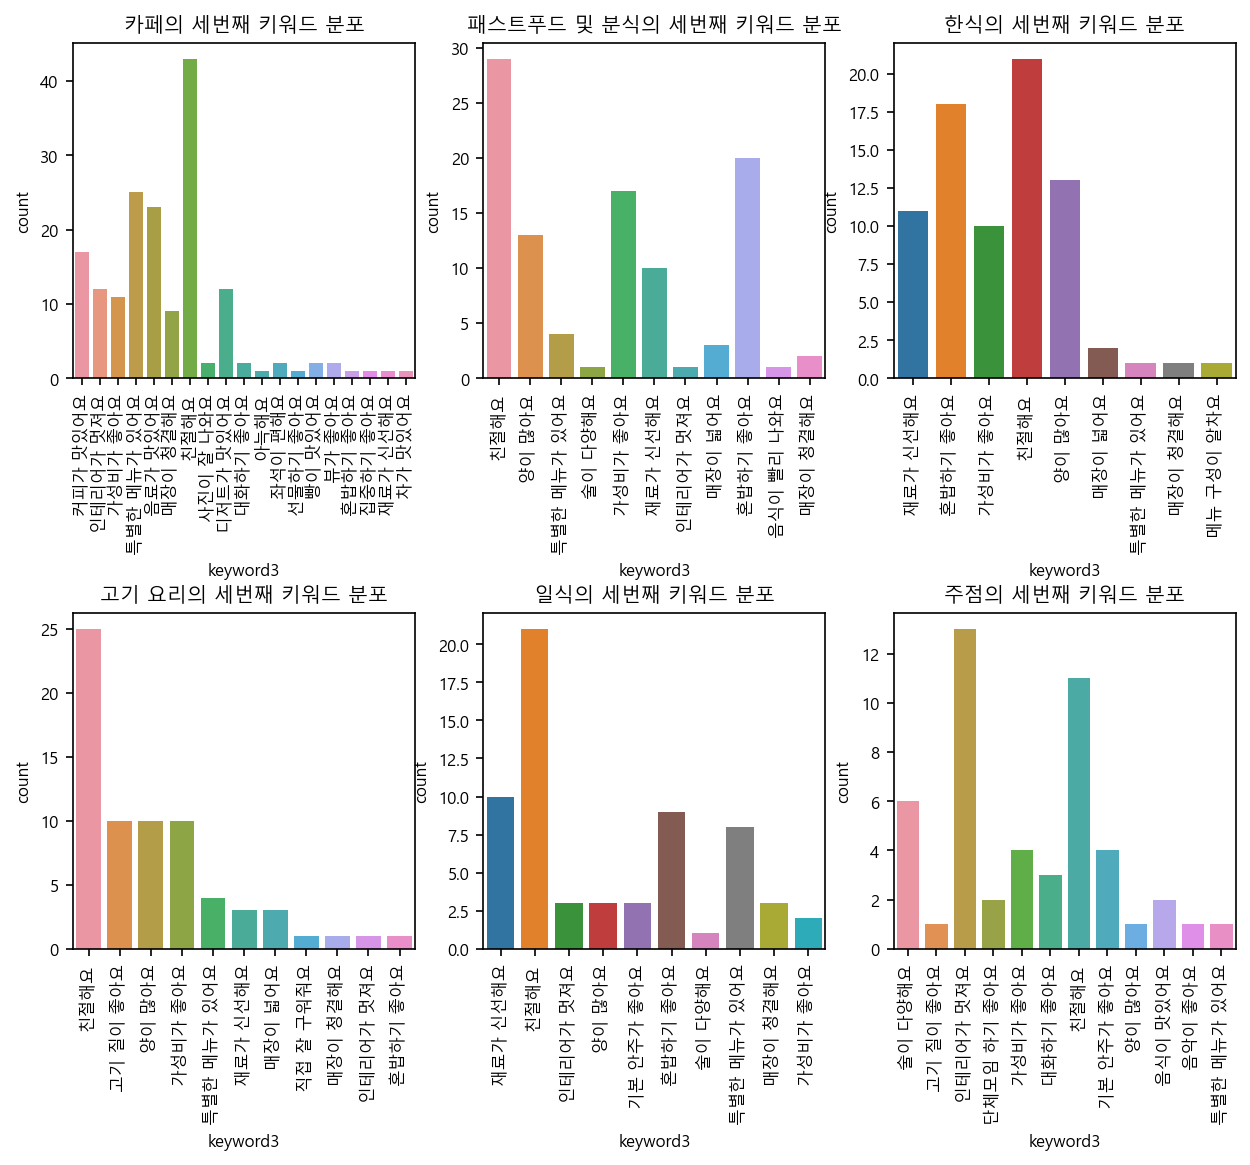

In [81]:
### keyword3
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword3', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 세번째 키워드 분포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 세번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 세번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 세번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 세번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 세번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

### 워드클라우드

#### 한 리뷰의 워드클라우드

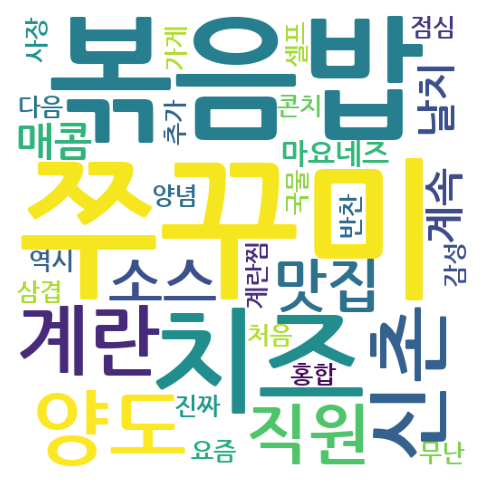

In [91]:
#패키지 임포트
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/NanumGothicBold.ttf"
def reviewcloud(df, num):
    review = df["reviews"][num]

    #Okt 객체 생성
    okt = Okt()

    # 텍스트에서 명사 추출
    nouns = okt.nouns(review)

    #두 글자 이상 단어만 추출
    nouns_long = [i for i in nouns if len(i) > 1]

    #명사별 빈도 계산
    noun_counts = Counter(nouns_long)

    # 2번 이상 출현한 단어들만 필터링
    filtered_noun_counts = {noun: count for noun, count in noun_counts.items() if count >= 2}

    #클라우드 생성
    wordcloud = WordCloud(font_path=font_path, width=500, height=500, 
                          background_color='white').generate_from_frequencies(filtered_noun_counts)

    # 워드 클라우드 시각화
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


reviewcloud(df, 0)

#### category별 리뷰의 워드클라우드

In [97]:
def reviewcloud_cat(df):
    review = df["reviews"]
    review = "".join(review)
    okt = Okt()
    nouns = okt.nouns(review)
    nouns_long = [i for i in nouns if len(i) > 1]
    noun_counts = Counter(nouns_long)
    filtered_noun_counts = {noun: count for noun, count in noun_counts.items() if count >= 2}
    wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color='white').generate_from_frequencies(filtered_noun_counts)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

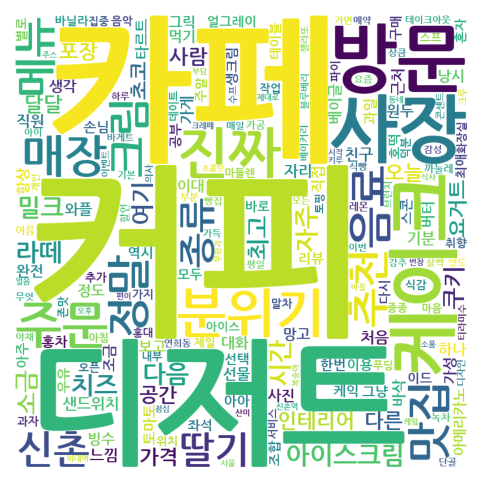

In [98]:
### 카페
reviewcloud_cat(df[df['category'] == '카페'])

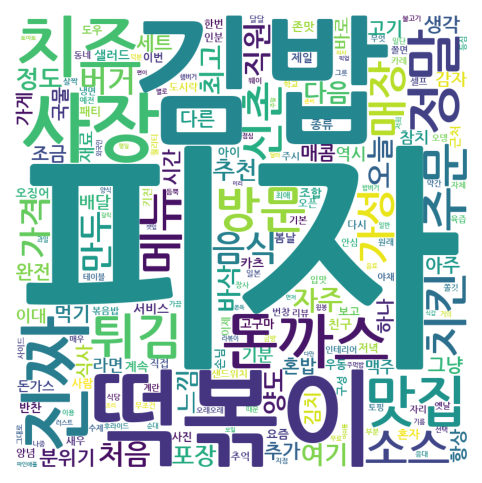

In [99]:
### 패스트푸드 및 분식
reviewcloud_cat(df[df['category'] == '패스트푸드및분식'])

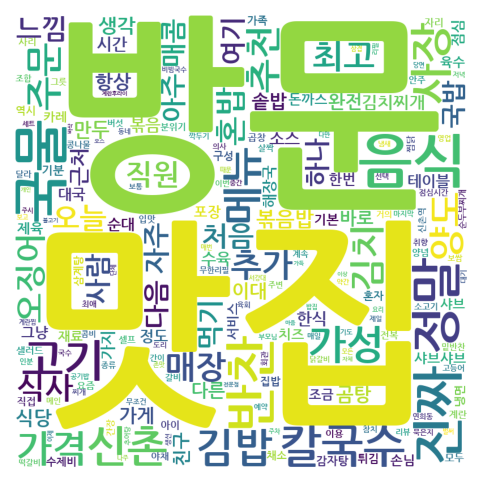

In [100]:
### 한식
reviewcloud_cat(df[df['category'] == '한식'])

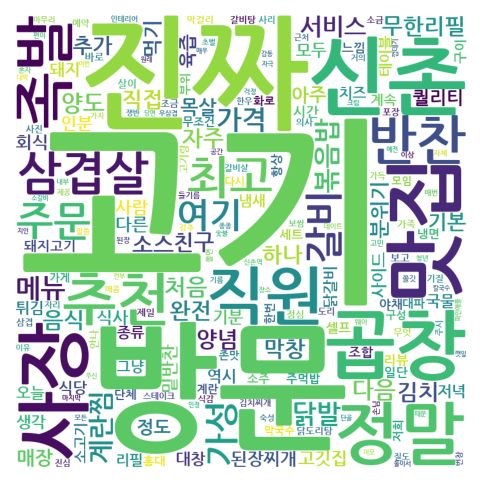

In [101]:
### 고기요리
reviewcloud_cat(df[df['category'] == '고기요리'])

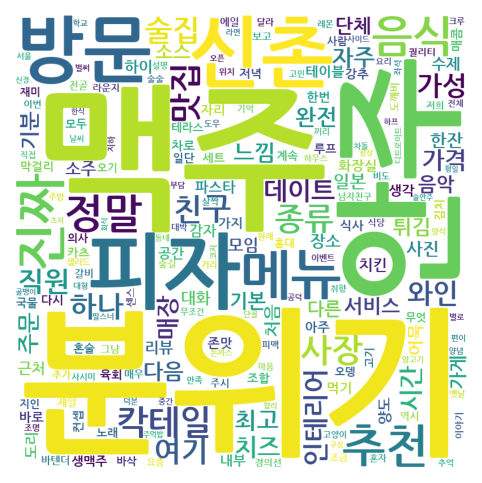

In [102]:
### 주점
reviewcloud_cat(df[df['category'] == '주점'])

#### keyword별 리뷰의 워드클라우드

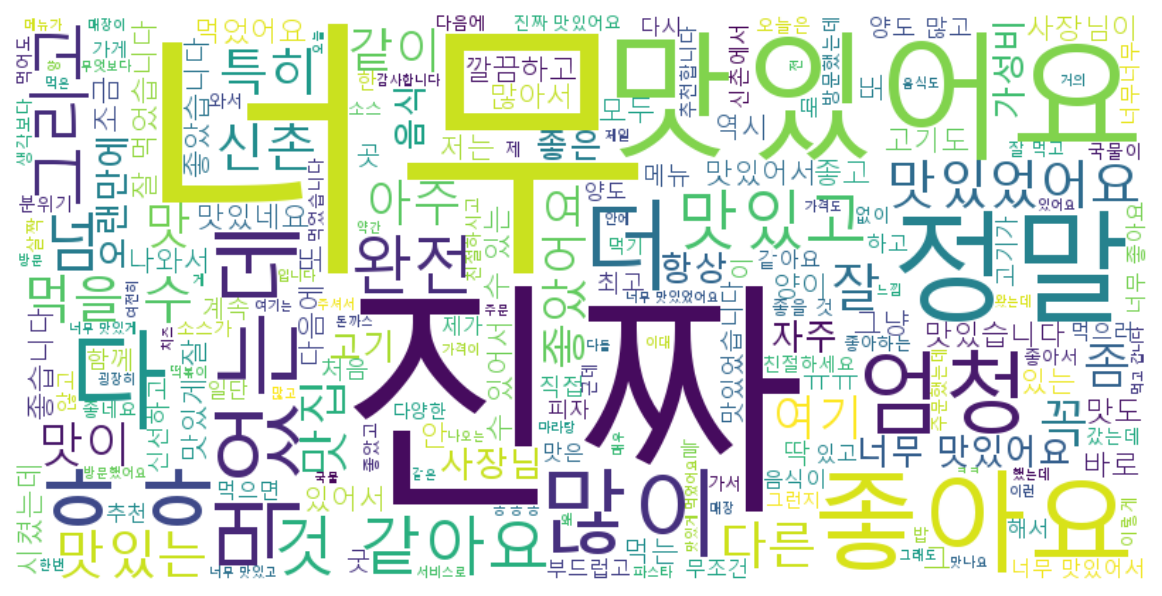

In [108]:
### keyword1 : '음식이 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='음식이 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

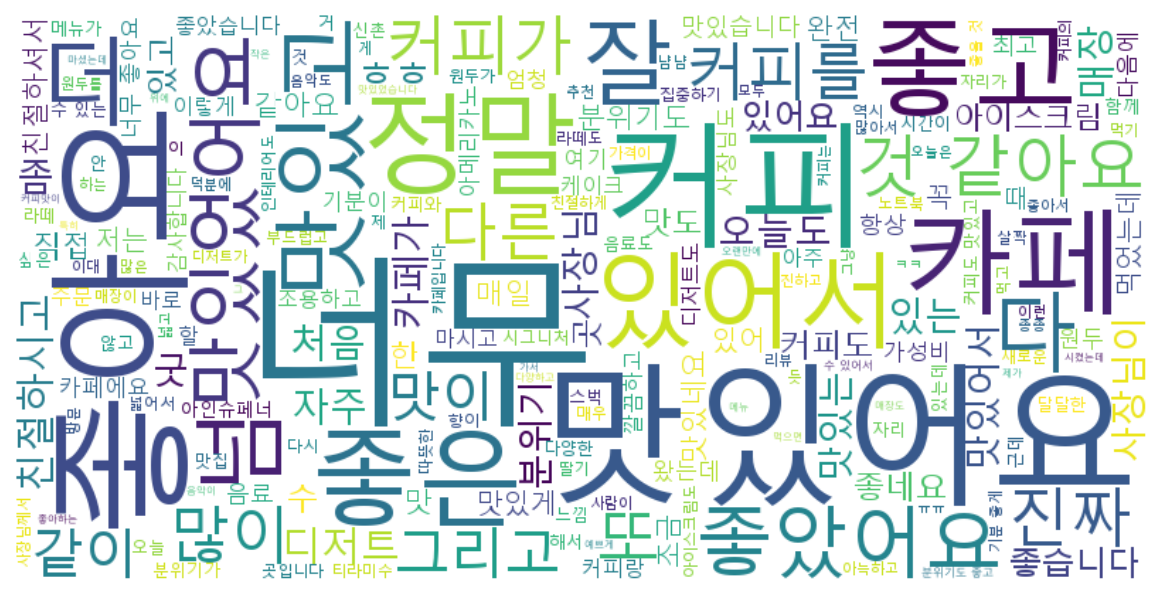

In [109]:
### keyword1 : '커피가 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='커피가 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

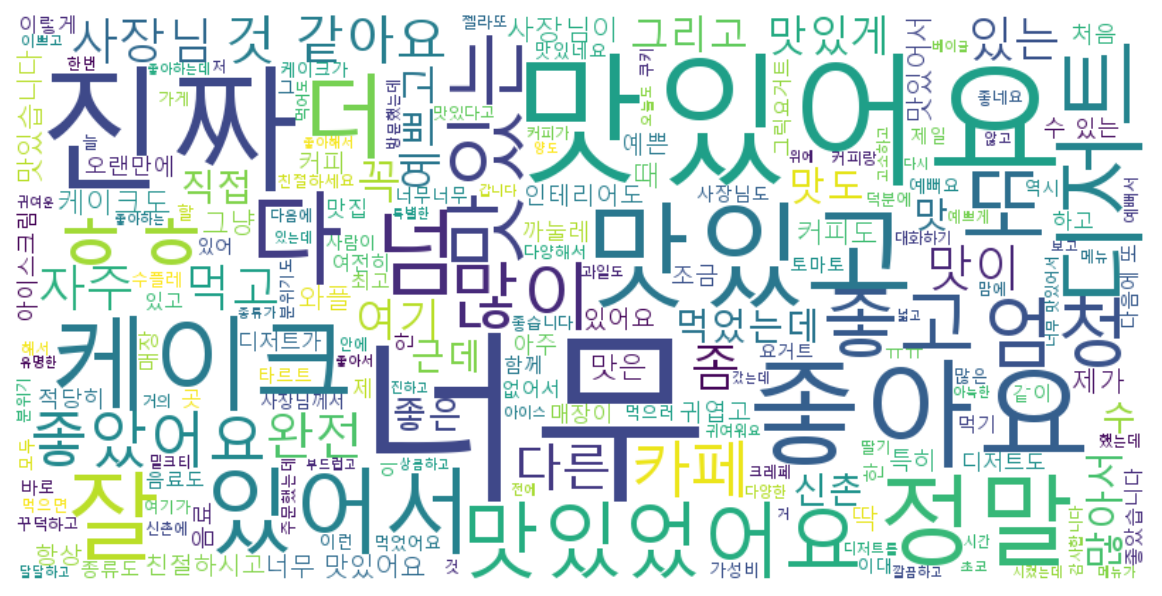

In [110]:
### keyword1 : '디저트가 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='디저트가 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

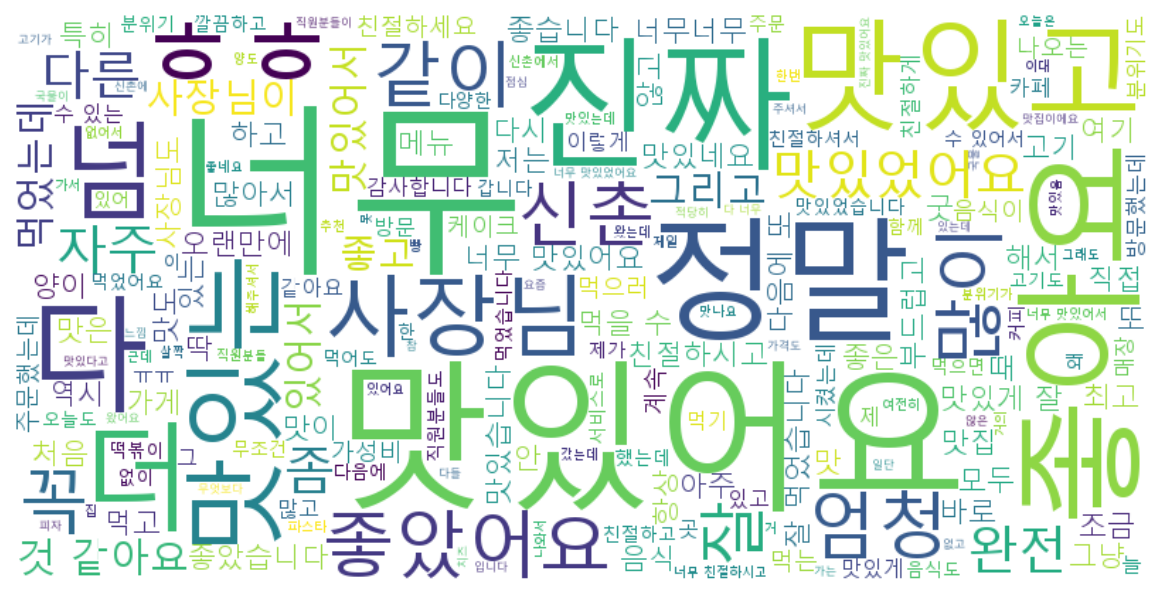

In [111]:
### keyword2 : '친절해요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='친절해요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

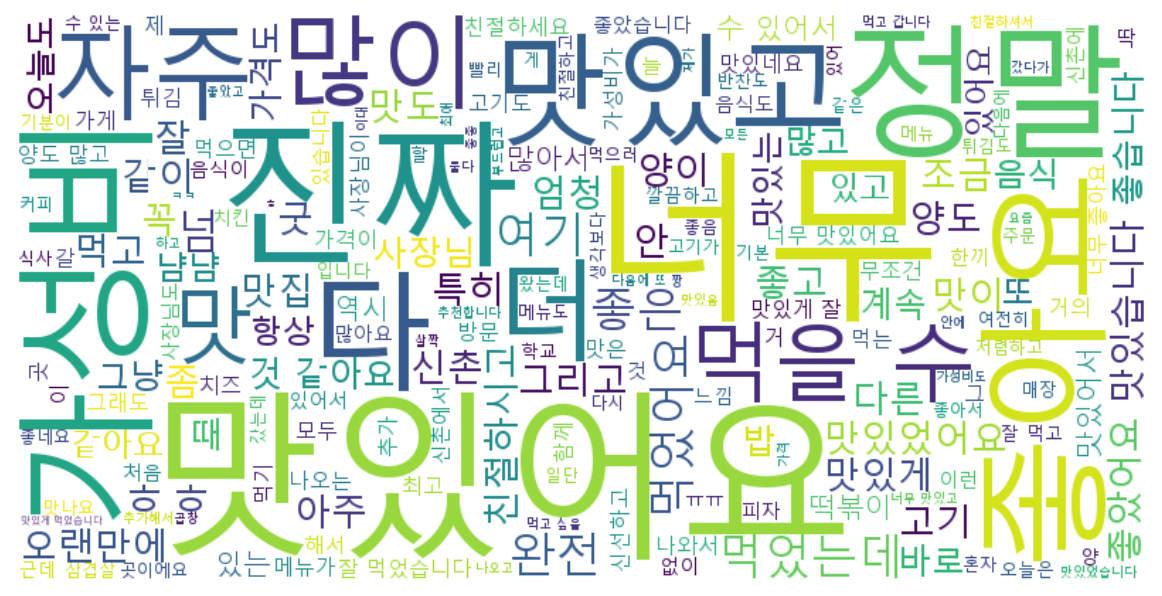

In [112]:
### keyword2 : '가성비가 좋아요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='가성비가 좋아요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

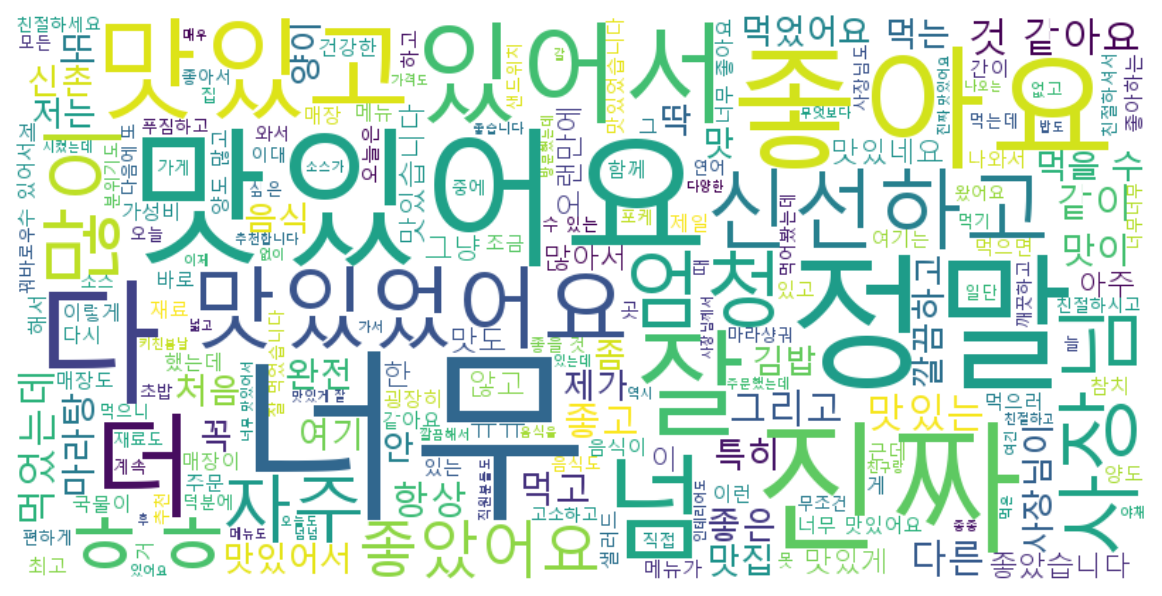

In [113]:
### keyword2 : '재료가 신선해요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='재료가 신선해요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 첫번째 키워드가 '음식이 맛있어요'인 매장 리뷰 분석

In [119]:
### 라이브러리 
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
from konlpy.tag import Okt
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lgpc\AppData\Roaming\nltk_data...
[nltk_

True

In [116]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 16):
  globals()['mask_{}'.format(i)] = (df.keyword1 == df['keyword1'].unique()[i])

# 전체 및 그룹 집합을 설정합니다.
df_train = df.reviews.copy() # 전체 train 데이터

for i in range(0, 16):
  globals()['df_{}'.format(i)] = df.loc[globals()['mask_{}'.format(i)],:].reviews # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5,
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15]

In [121]:
# 워드 토큰화
def df2str(df):

    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

word_tokens = nltk.word_tokenize(df2str(df_0))
okt = Okt()
morphs = okt.pos(df2str(df_0))
words = [word for word, pos in morphs if pos == 'Noun']

from collections import Counter
stopwords = ['방문', '맛집', '신촌', '음식', '메뉴', '너무', '맛있어요', '진짜', '잘', '정말', '다', '수', '좋아요', '맛있게', '또', '아','휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해','을','를','에','의','가','으로','로','에게','뿐이다','의거하여','근거하여','입각하여','기준으로','예하면','예를 들면','예를 들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수 없다','해서는 안된다','뿐만 아니라','만이 아니다','만은 아니다','막론하고','관계없이','그치지 않다','그러나','그런데','하지만','든간에','논하지 않다','따지지 않다','설사','비록','더라도','아니면','만 못하다','하는 편이 낫다','불문하고','향하여','향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이 외에','이 밖에','하여야','비로소','한다면 몰라도','외에도','이곳','여기','부터','기점으로','따라서','할 생각이다','하려고하다','이리하여','그리하여','그렇게 함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다','일것이다','반드시','할줄알다','할수있다','할수있어','임에 틀림없다','한다면','등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나','얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해 말하자면','뿐이다','다음에','반대로','반대로 말하자면','이와 반대로','바꾸어서 말하면','바꾸어서 한다면','만약','그렇지않으면','까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다','에 가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한 까닭에','하기 때문에','거니와','이지만','대하여','관하여','관한','과연','실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에','어찌','하겠는가','무슨','어디','어느곳','더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야','콸콸','졸졸','좍좍','뚝뚝','주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에 따르는','때가 되어','즉','지든지','설령','가령','하더라도','할지라도','일지라도','지든지','몇','거의','하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서 보아','비추어 보아','고려하면','하게될것이다','일것이다','비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자','더욱더','불구하고','얼마든지','마음대로','주저하지 않고','곧','즉시','바로','당장','하자마자','밖에 안된다','하면된다','그래','그렇지','요컨대','다시 말하자면','바꿔 말하면','즉','구체적으로 말하자면','시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서','로부터','까지','예하면','했어요','해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른 방면으로','해봐요','습니까','했어요','말할것도 없고','무릎쓰고','개의치않고','하는것만 못하다','하는것이 낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해','어느 년도','라 해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때','그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할 줄 안다','할 힘이 있다','너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다','토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라','힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로 쓰여','입장에서','위해서','단지','의해되다','하도록시키다','뿐만아니라','반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대','이럴정도로','어떻게','만약','만일','위에서 서술한바와같이','인 듯하다','하지 않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도 불구하고','여전히','심지어','까지도','조차도','하지 않도록','않기 위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가 알겠는가','아무도','줄은모른다','줄은 몰랏다','하는 김에','겸사겸사','하는바','그런 까닭에','한 이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기 위하여','어찌하여','무엇때문에','붕붕','윙윙','나','우리','엉엉','휘익','윙윙','오호','아하','어쨋든','만 못하다','하기보다는','차라리','하는 편이 낫다','흐흐','놀라다','상대적으로 말하자면','마치','아니라면','쉿','그렇지 않으면','그렇지 않다면','안 그러면','아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수 없다','하나','일','일반적으로','일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목','근거로','하기에','아울러','하지 않도록','않기 위해서','이르기까지','이 되다','로 인하여','까닭으로','이유만으로','이로 인하여','그래서','이 때문에','그러므로','그런 까닭에','알 수 있다','결론을 낼 수 있다','으로 인하여','있다','어떤것','관계가 있다','관련이 있다','연관되다','어떤것들','에 대해','이리하여','그리하여','여부','하기보다는','하느니','하면 할수록','운운','이러이러하다','하구나','하도다','다시말하면','다음으로','에 있다','에 달려 있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번','이렇게말하자면','이런','이러한','이와 같은','요만큼','요만한 것','얼마 안 되는 것','이만큼','이 정도의','이렇게 많은 것','이와 같다','이때','이렇구나','것과 같이','끼익','삐걱','따위','와 같은 사람들','부류의 사람들','왜냐하면','중의하나','오직','오로지','에 한하다','하기만 하면','도착하다','까지 미치다','도달하다','정도에 이르다','할 지경이다','결과에 이르다','관해서는','여러분','하고 있다','한 후','혼자','자기','자기집','자신','우에 종합한것과같이','총적으로 보면','총적으로 말하면','총적으로','대로 하다','으로서','참','그만이다','할 따름이다','쿵','탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니','와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋','넷','다섯','여섯','일곱','여덟','아홉','령','영']
result = [x for x in words if x not in stopwords and len(x) > 1]

c = Counter(result)
print(c.most_common(10))

[('사장', 620), ('고기', 597), ('추천', 476), ('주문', 446), ('분위기', 419), ('직원', 381), ('가성', 367), ('소스', 365), ('가격', 362), ('매장', 361)]


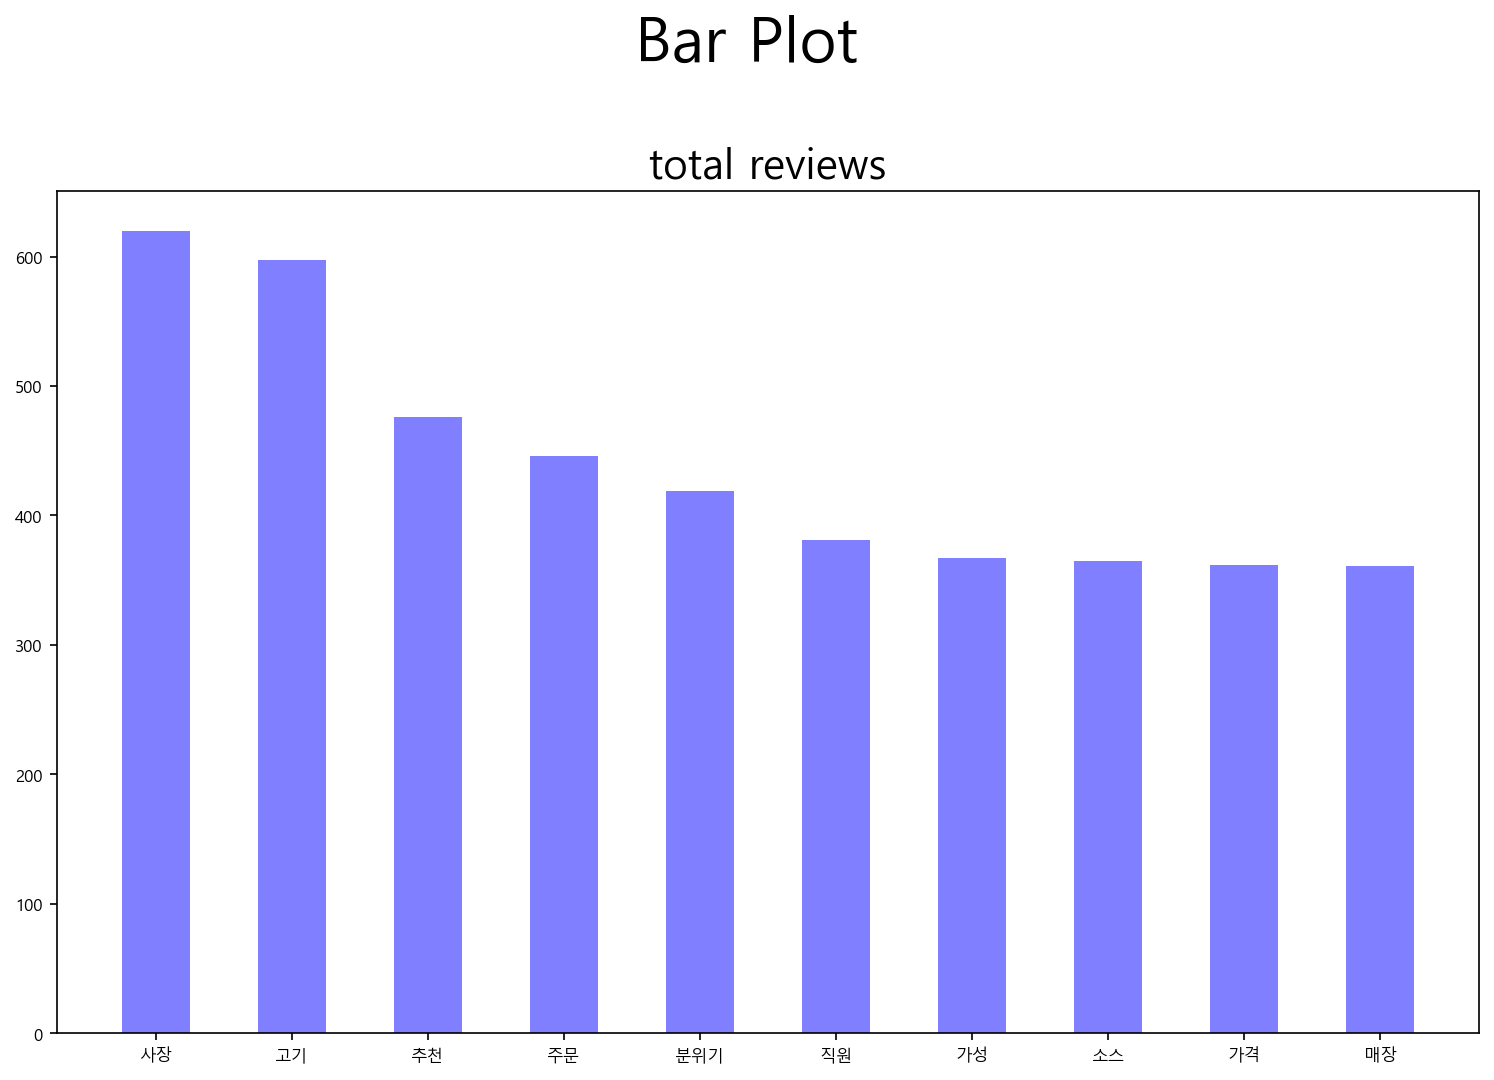

In [122]:
### 전체 리뷰에서 추출한 명사 중 상위 10개 시각화
top_10 = c.most_common(10) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

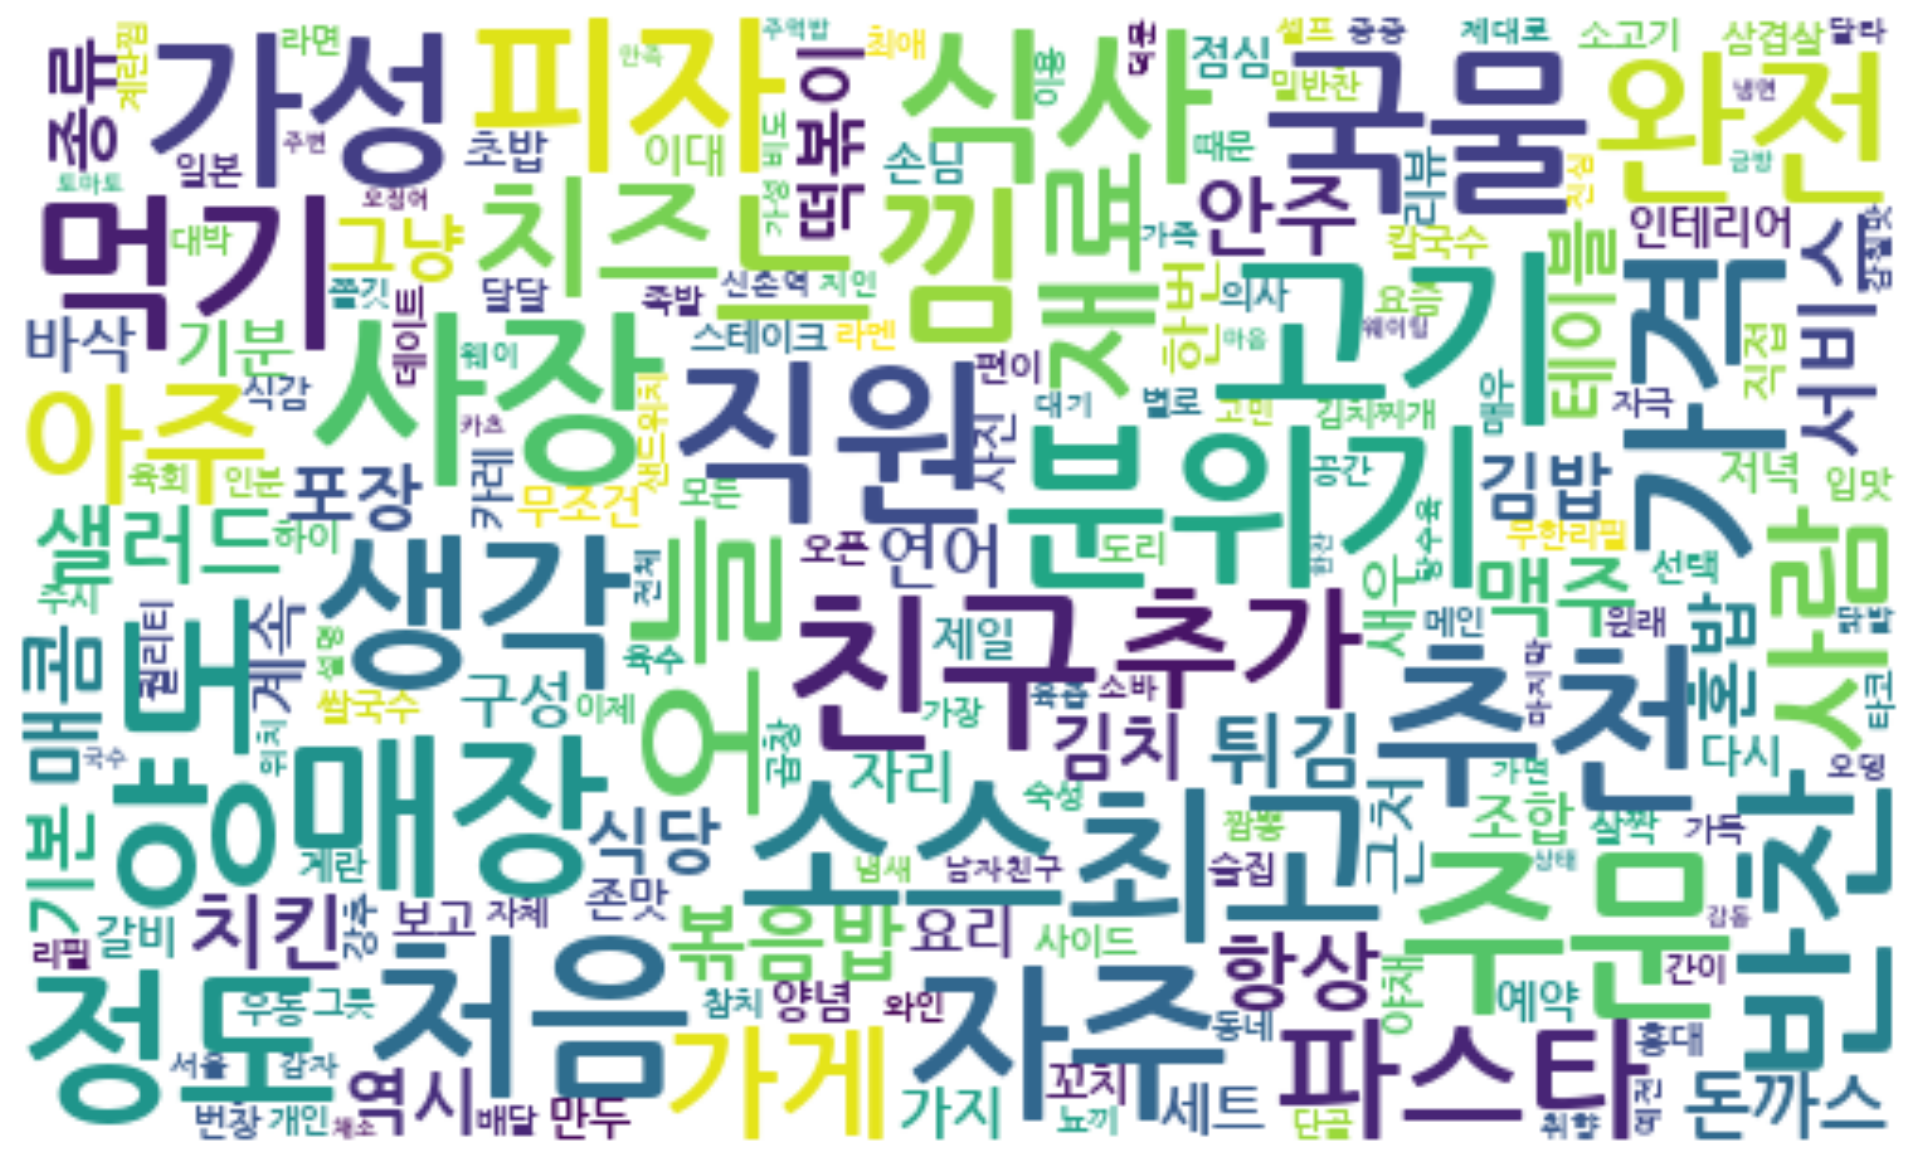

In [124]:
### 워드클라우드 
noun_text = " ".join(result)
wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2, #상대적인 크기
                      font_path=font_path
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()